# 03 - Time Series Visualization

## Introduction

Time series data is everywhere in data engineering: pipeline metrics, data volumes, system performance, and business metrics. Visualizing time series effectively is crucial for monitoring, analysis, and reporting.

## What You'll Learn

- Creating time series plots with proper date formatting
- Handling datetime data from Pandas
- Multiple time series on one plot
- Resampling and aggregating time series data
- Customizing date axes
- Time series patterns and trends


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Set style
plt.style.use('default')


## Basic Time Series Plot

Time series plots show how a variable changes over time. In data engineering, you'll use them for:
- **Pipeline monitoring**: Track ETL job performance over time
- **Data volume trends**: Monitor data growth
- **System metrics**: CPU, memory, disk usage
- **Business metrics**: Sales, users, transactions

**Key Requirements:**
- Proper date formatting on x-axis
- Clear labels and titles
- Appropriate time intervals


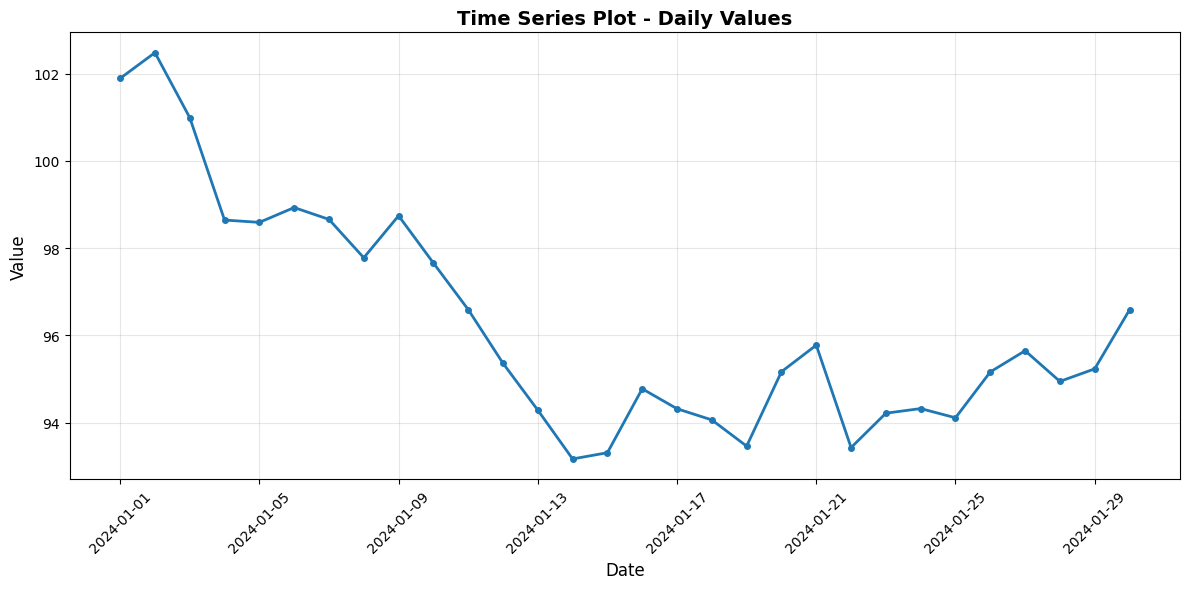

In [2]:
# Create time series data using pandas date_range
dates = pd.date_range('2024-01-01', periods=30, freq='D')
values = np.random.randn(30).cumsum() + 100  # Random walk starting at 100

# Create DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Value': values
})

# Basic time series plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Value'], marker='o', linewidth=2, markersize=4)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Time Series Plot - Daily Values', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Using Pandas Plot for Time Series

Pandas makes time series plotting very easy when your DataFrame has a datetime index.


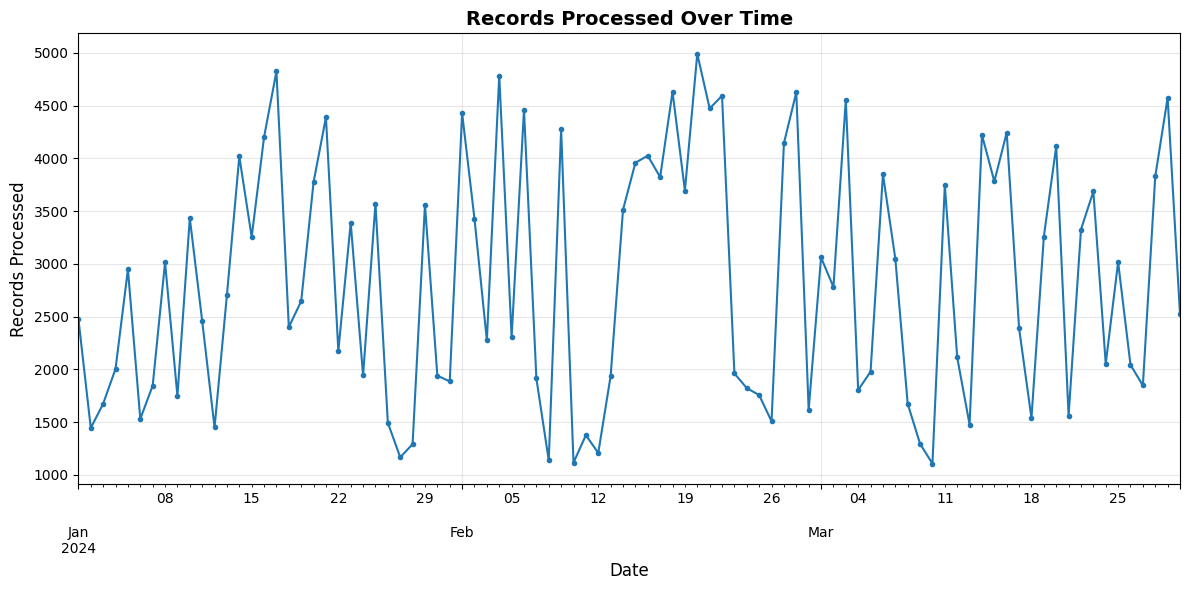

In [3]:
# Create DataFrame with datetime index
dates = pd.date_range('2024-01-01', periods=90, freq='D')
df = pd.DataFrame({
    'Records_Processed': np.random.randint(1000, 5000, 90),
    'Processing_Time': np.random.uniform(10, 60, 90)
}, index=dates)

# Plot using pandas (automatically handles dates)
df['Records_Processed'].plot(figsize=(12, 6), marker='o', markersize=3)
plt.title('Records Processed Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Records Processed', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Multiple Time Series

You can plot multiple time series on the same plot to compare different metrics.


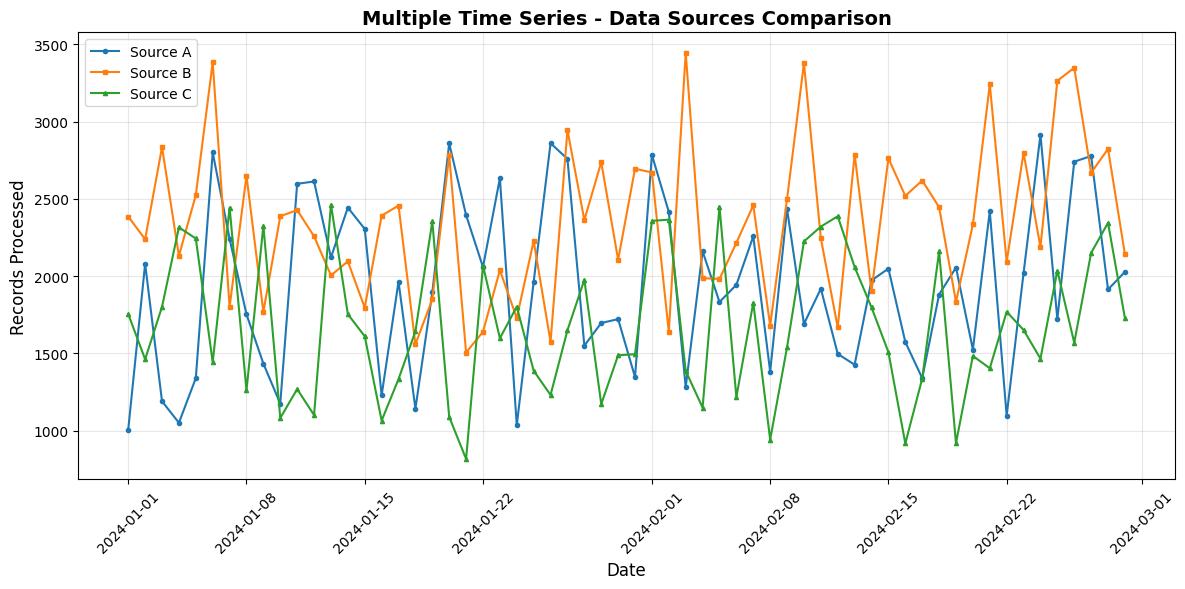

In [4]:
# Create multiple time series
dates = pd.date_range('2024-01-01', periods=60, freq='D')
df = pd.DataFrame({
    'Date': dates,
    'Source_A': np.random.randint(1000, 3000, 60),
    'Source_B': np.random.randint(1500, 3500, 60),
    'Source_C': np.random.randint(800, 2500, 60)
})

# Plot multiple series
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Source_A'], label='Source A', marker='o', markersize=3)
plt.plot(df['Date'], df['Source_B'], label='Source B', marker='s', markersize=3)
plt.plot(df['Date'], df['Source_C'], label='Source C', marker='^', markersize=3)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Records Processed', fontsize=12)
plt.title('Multiple Time Series - Data Sources Comparison', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Resampling Time Series

When you have high-frequency data (e.g., hourly), you often want to aggregate it to daily, weekly, or monthly views for better visualization.


/var/folders/qs/gl7f55l16vn33l0848mpksch0000gp/T/ipykernel_25353/1243175076.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_dates = pd.date_range('2024-01-01', periods=720, freq='H')  # 30 days of hourly data


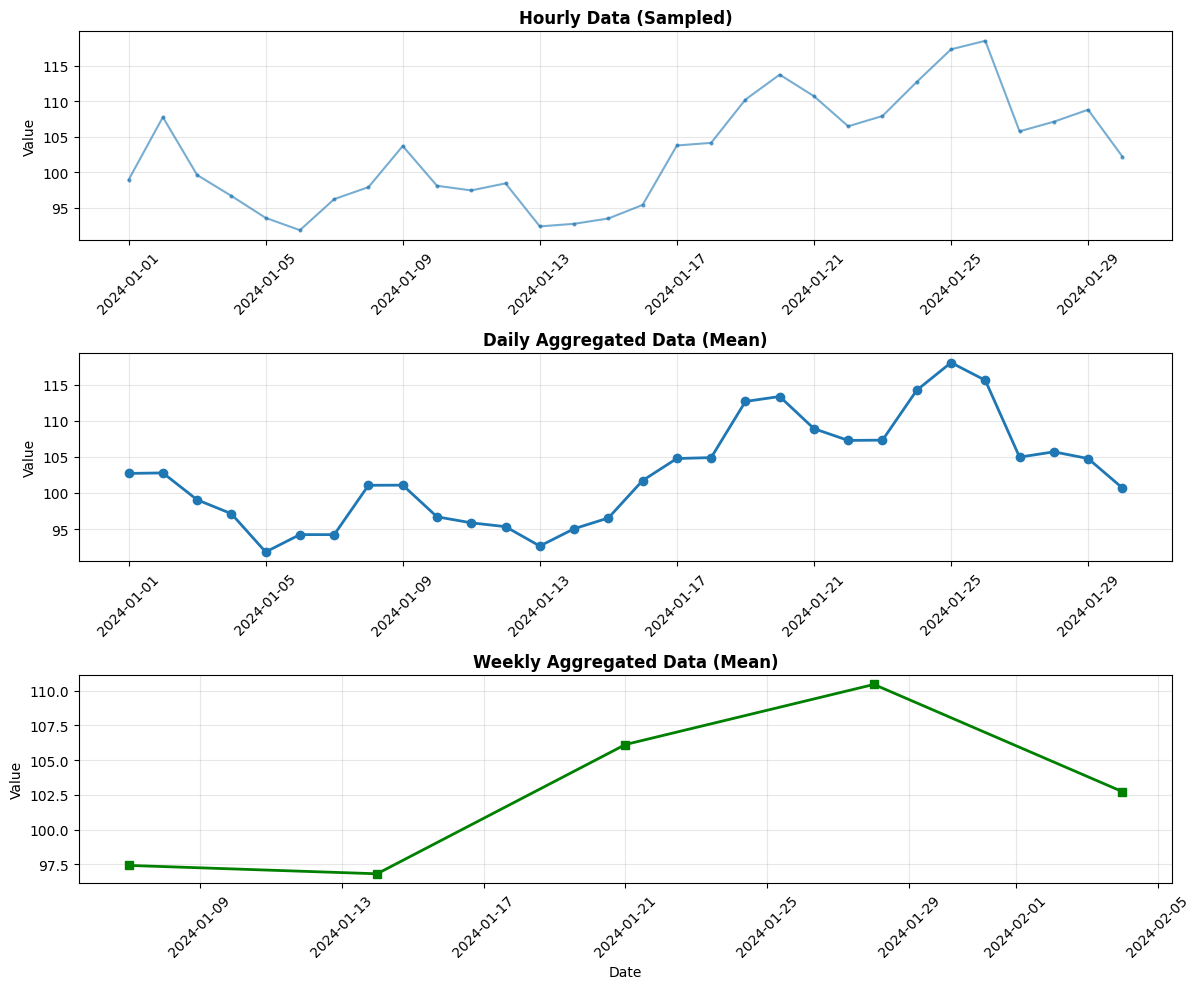

In [5]:
# Create hourly data
hourly_dates = pd.date_range('2024-01-01', periods=720, freq='H')  # 30 days of hourly data
hourly_data = pd.DataFrame({
    'Timestamp': hourly_dates,
    'Value': np.random.randn(720).cumsum() + 100
})
hourly_data.set_index('Timestamp', inplace=True)

# Resample to daily (mean)
daily_data = hourly_data.resample('D').mean()

# Resample to weekly (mean)
weekly_data = hourly_data.resample('W').mean()

# Plot original and resampled data
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Hourly data (sample for visibility)
axes[0].plot(hourly_data.index[::24], hourly_data['Value'][::24], 
            marker='o', markersize=2, alpha=0.6)
axes[0].set_title('Hourly Data (Sampled)', fontweight='bold')
axes[0].set_ylabel('Value')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# Daily data
axes[1].plot(daily_data.index, daily_data['Value'], marker='o', linewidth=2)
axes[1].set_title('Daily Aggregated Data (Mean)', fontweight='bold')
axes[1].set_ylabel('Value')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

# Weekly data
axes[2].plot(weekly_data.index, weekly_data['Value'], marker='s', linewidth=2, color='green')
axes[2].set_title('Weekly Aggregated Data (Mean)', fontweight='bold')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Value')
axes[2].grid(True, alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## Customizing Date Formatting

Matplotlib can automatically format dates, but sometimes you need custom formatting for better readability.


/var/folders/qs/gl7f55l16vn33l0848mpksch0000gp/T/ipykernel_25353/1283835662.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range('2023-01-01', periods=24, freq='M')


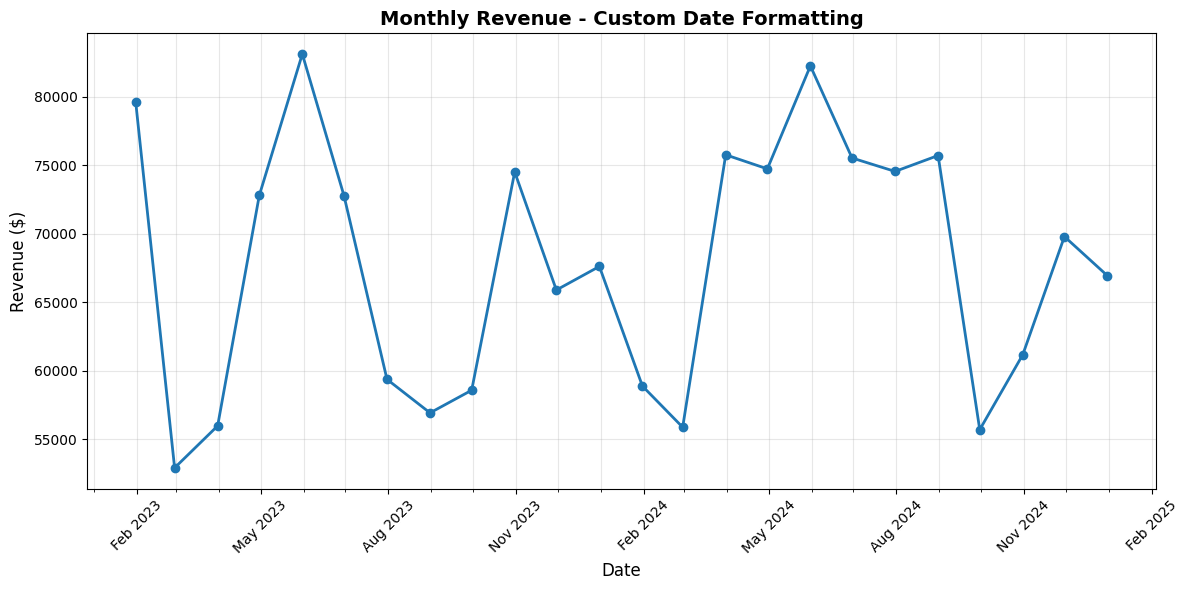

In [6]:
from matplotlib.dates import DateFormatter, MonthLocator, DayLocator

# Create monthly data
dates = pd.date_range('2023-01-01', periods=24, freq='M')
df = pd.DataFrame({
    'Date': dates,
    'Revenue': np.random.randint(50000, 100000, 24)
})

# Create plot with custom date formatting
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(df['Date'], df['Revenue'], marker='o', linewidth=2, markersize=6)

# Customize date formatting
ax.xaxis.set_major_locator(MonthLocator(interval=3))  # Major ticks every 3 months
ax.xaxis.set_minor_locator(MonthLocator())  # Minor ticks every month
ax.xaxis.set_major_formatter(DateFormatter('%b %Y'))  # Format: Jan 2023

plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.title('Monthly Revenue - Custom Date Formatting', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, which='both')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Time Series with Moving Averages

Moving averages help smooth out noise and identify trends in time series data.


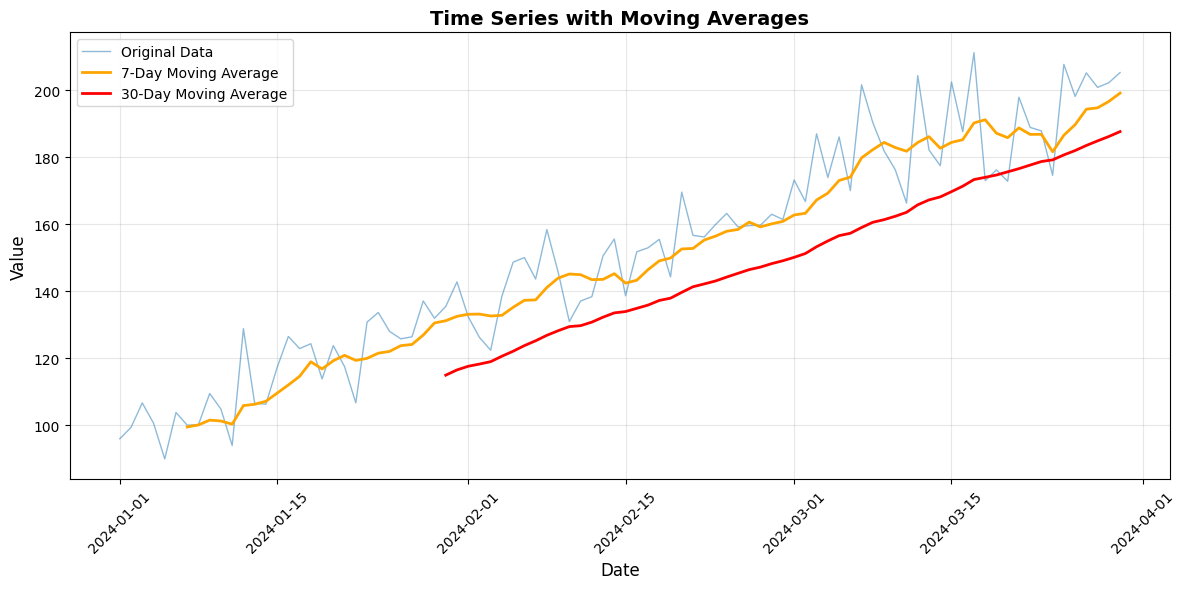

In [7]:
# Create time series with trend and noise
dates = pd.date_range('2024-01-01', periods=90, freq='D')
trend = np.linspace(100, 200, 90)  # Upward trend
noise = np.random.randn(90) * 10
values = trend + noise

df = pd.DataFrame({
    'Date': dates,
    'Value': values
})

# Calculate moving averages
df['MA_7'] = df['Value'].rolling(window=7).mean()   # 7-day moving average
df['MA_30'] = df['Value'].rolling(window=30).mean()  # 30-day moving average

# Plot original data and moving averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Value'], label='Original Data', alpha=0.5, linewidth=1)
plt.plot(df['Date'], df['MA_7'], label='7-Day Moving Average', linewidth=2, color='orange')
plt.plot(df['Date'], df['MA_30'], label='30-Day Moving Average', linewidth=2, color='red')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('Time Series with Moving Averages', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Real-World Example: ETL Pipeline Monitoring Dashboard

Let's create a comprehensive time series dashboard for monitoring an ETL pipeline.


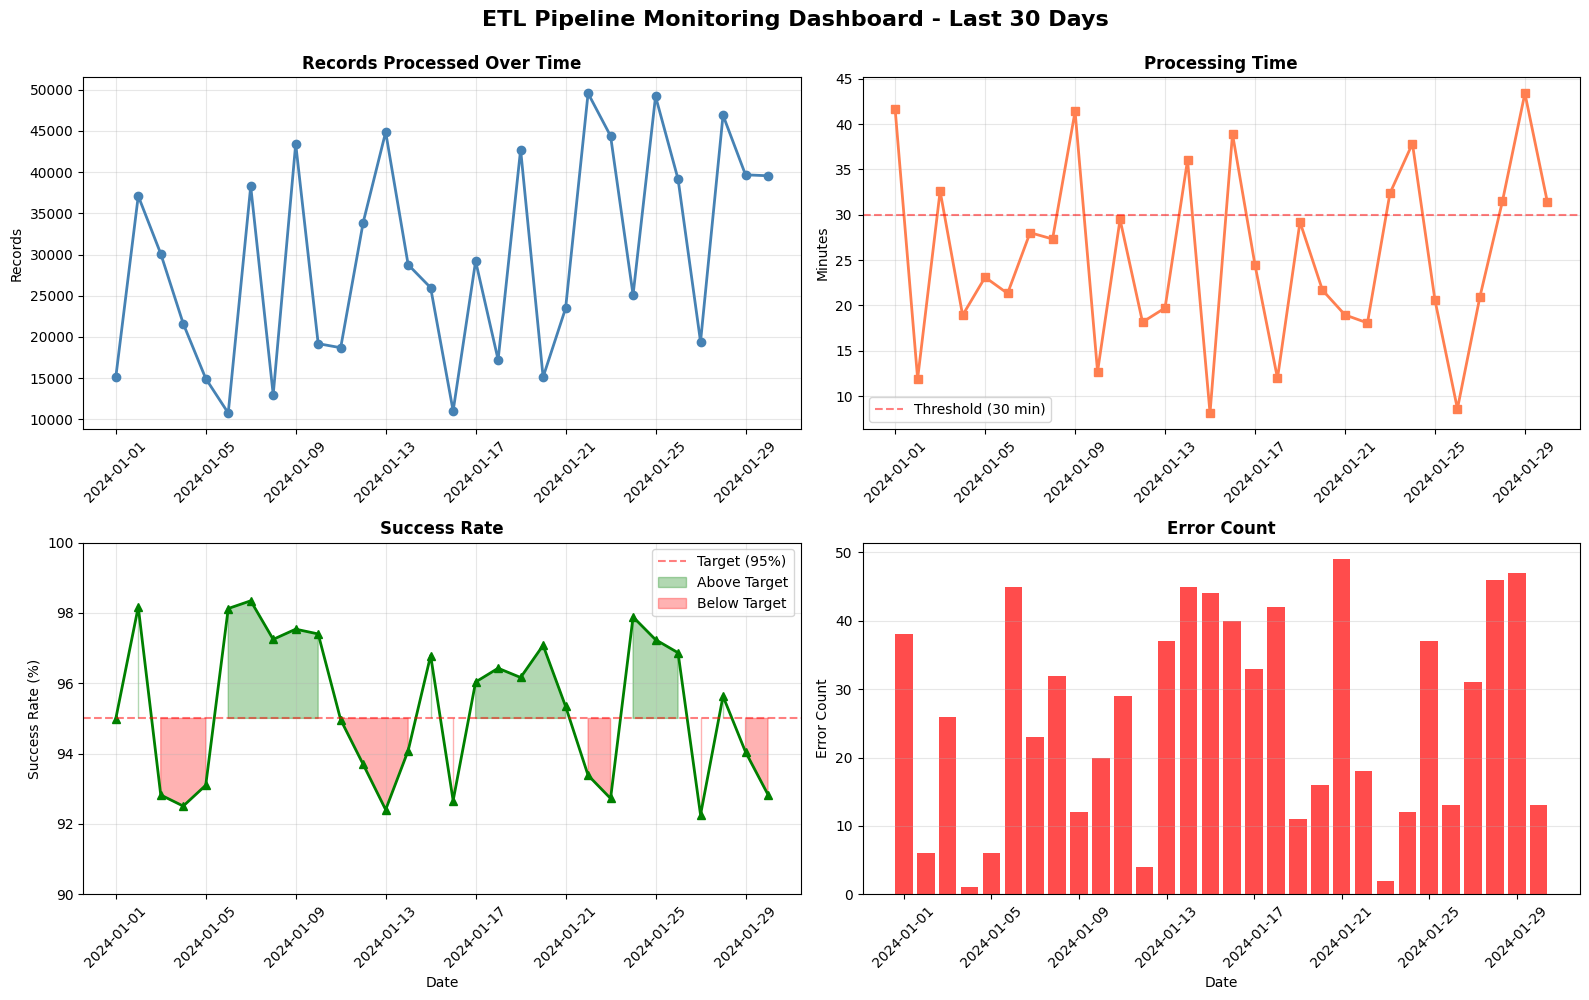

In [8]:
# Simulate ETL pipeline metrics for the past 30 days
dates = pd.date_range('2024-01-01', periods=30, freq='D')
pipeline_metrics = pd.DataFrame({
    'Date': dates,
    'Records_Processed': np.random.randint(10000, 50000, 30),
    'Processing_Time_Minutes': np.random.uniform(5, 45, 30),
    'Success_Rate': np.random.uniform(0.92, 0.99, 30),
    'Error_Count': np.random.randint(0, 50, 30)
})

# Create dashboard with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Records Processed Over Time
axes[0, 0].plot(pipeline_metrics['Date'], pipeline_metrics['Records_Processed'], 
                marker='o', linewidth=2, color='steelblue')
axes[0, 0].set_title('Records Processed Over Time', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Records')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Processing Time
axes[0, 1].plot(pipeline_metrics['Date'], pipeline_metrics['Processing_Time_Minutes'], 
                marker='s', linewidth=2, color='coral')
axes[0, 1].axhline(y=30, color='r', linestyle='--', alpha=0.5, label='Threshold (30 min)')
axes[0, 1].set_title('Processing Time', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Minutes')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Success Rate
axes[1, 0].plot(pipeline_metrics['Date'], pipeline_metrics['Success_Rate'] * 100, 
                marker='^', linewidth=2, color='green')
axes[1, 0].axhline(y=95, color='r', linestyle='--', alpha=0.5, label='Target (95%)')
axes[1, 0].fill_between(pipeline_metrics['Date'], 95, pipeline_metrics['Success_Rate'] * 100, 
                        where=(pipeline_metrics['Success_Rate'] * 100 >= 95), 
                        alpha=0.3, color='green', label='Above Target')
axes[1, 0].fill_between(pipeline_metrics['Date'], 95, pipeline_metrics['Success_Rate'] * 100, 
                        where=(pipeline_metrics['Success_Rate'] * 100 < 95), 
                        alpha=0.3, color='red', label='Below Target')
axes[1, 0].set_title('Success Rate', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Success Rate (%)')
axes[1, 0].set_ylim([90, 100])
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Error Count
axes[1, 1].bar(pipeline_metrics['Date'], pipeline_metrics['Error_Count'], 
               color='red', alpha=0.7, width=0.8)
axes[1, 1].set_title('Error Count', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Error Count')
axes[1, 1].grid(True, axis='y', alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.suptitle('ETL Pipeline Monitoring Dashboard - Last 30 Days', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


## Summary

In this notebook, you learned:

1. **Basic time series plots**: Creating plots with datetime data
2. **Pandas integration**: Using pandas for easy time series plotting
3. **Multiple time series**: Comparing different metrics on one plot
4. **Resampling**: Aggregating high-frequency data for better visualization
5. **Date formatting**: Customizing how dates appear on axes
6. **Moving averages**: Smoothing data to identify trends
7. **Real-world dashboard**: Comprehensive monitoring visualization

**Key Takeaways:**
- Time series visualization is essential for monitoring data pipelines
- Pandas makes time series plotting easy with datetime indexes
- Resampling helps visualize trends in high-frequency data
- Moving averages help identify patterns in noisy data
- Custom date formatting improves readability
- Combine multiple plots for comprehensive dashboards

**Next Steps**: In the next notebook, we'll explore styling and themes to make your plots more professional and visually appealing.
